In [1]:
import tensorflow as tf
from tensorflow.keras.models import load_model
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os

In [2]:
categorie = os.listdir('./dataset/train')
model = load_model('Animals.keras')

In [3]:
def ImageToCNN(path):
    image=cv2.imread(path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    resized_image = cv2.resize(image, (256, 256))
    data = np.array([np.array(resized_image)])
    data = data / 255.0
    return data

In [4]:
def plot(path):
    label = []
    for img in os.listdir(path):
        data = ImageToCNN(f'{path}{img}')
        result = categorie[np.argmax(model.predict(data))]
        label.append(result)
    plt.figure(figsize=(10, 8))
    i = 1
    for image in os.listdir(path):
        plt.subplot(3, 4, i)
        final_image = cv2.imread(f'{path}{image}')
        final_image = cv2.cvtColor(final_image, cv2.COLOR_BGR2RGB)
        final_image = cv2.resize(final_image, (256, 256))
        plt.imshow(final_image)
        plt.axis('off')
        plt.title(label[i-1])
        i += 1

1/1 [==============================] - 0s 31ms/step


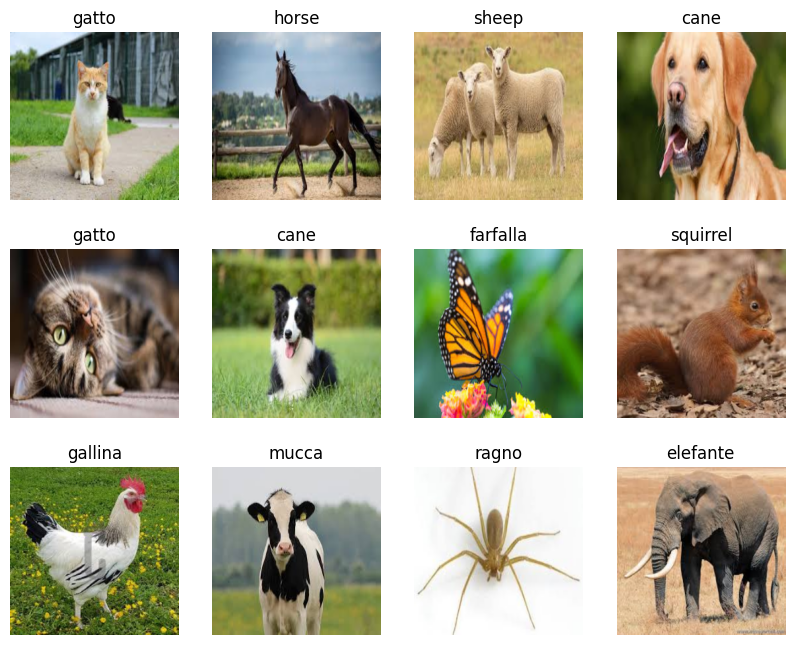

In [5]:
plot('./image_test/')